# Распознавание рукописных цифр MNIST

In [1]:
from pathlib import Path

import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

from PIL import Image

from matplotlib import pyplot as plt
%matplotlib inline

## Подготовка данных

Загрузка данных MNIST

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) =\
    mnist.load_data()

In [3]:
print(x_train_org.shape)

(60000, 28, 28)


Контрольное отображение цифры из набора

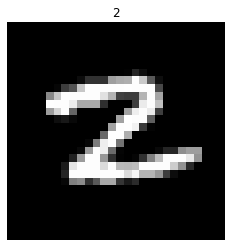

In [4]:
n = 143
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))

plt.title(str(y_train_org[n]))
plt.axis('off')

plt.show();

Отобразить примеры цифр из набора

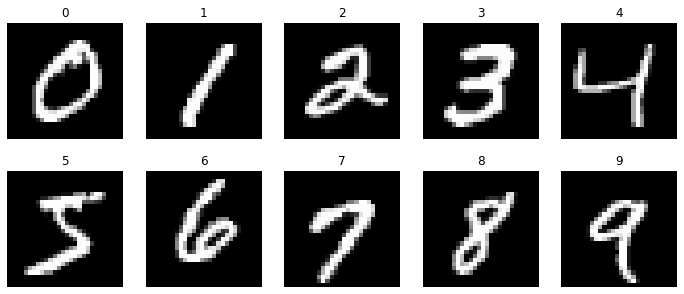

In [5]:
digits = np.unique(y_train_org)

_, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for digit, ax in zip(digits, axes):
    ax.imshow(
        Image.fromarray(x_train_org[y_train_org == digit][0]).convert('RGB')
    )

    ax.set_title(str(digit))
    ax.set_axis_off()

plt.show();

Изменить формат входных изображений

In [6]:
x_train = x_train_org.reshape(-1, 28*28).astype(np.float32) / 255
x_test = x_test_org.reshape(-1, 28*28).astype(np.float32) / 255

Преобразовать ответы в унитарный код (one-hot)

In [7]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [8]:
print(y_train.shape)

(60000, 10)


## Создание нейронной сети

In [9]:
model = Sequential()
model.add(
    Dense(
        800,
        input_dim=28*28,
        activation='relu'
    )
)
model.add(
    Dense(
        400,
        activation='relu'
    )
)
model.add(
    Dense(
        10,
        activation='softmax'
    )
)

Компиляция нейронной сети

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучение нейронной сети

In [11]:
epochs = 15
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    verbose=1
)

Epoch 1/15
469/469 [==============================] - 5s 11ms/step - loss: 0.2070 - accuracy: 0.9382

Отобразить график изменения loss и accuracy в процессе обучения

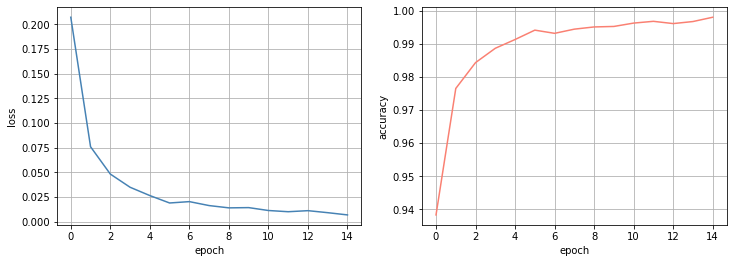

In [12]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(
    history.epoch,
    history.history['loss'],
    color='steelblue'
)
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].grid(True)

axes[1].plot(
    history.epoch,
    history.history['accuracy'],
    color='salmon'
)
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].grid(True)

plt.show();

Получить loss и accuracy для тестовой выборки

In [13]:
score = model.evaluate(x_test, y_test)
print(f"Test loss: {score[0]}\nTest accuracy: {score[1]}")

313/313 [==============================] - 3s 11ms/step - loss: 0.0838 - accuracy: 0.9826

Сохранить и загрузить веса нейронной сети

In [14]:
path = Path.home() / 'aiu-01-mnist-ultra-light-model.h5'

model.save_weights(path)
model.load_weights(path)

## Распознавание рукописных цифр

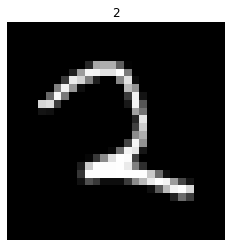

In [15]:
n_rec = 387

plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGB'))

plt.title(str(y_test_org[n_rec]))
plt.axis('off')

plt.show();

Выбрать изображение из тестовой выборки

In [16]:
x = x_test[n_rec]
print(x.shape)

(784,)


Добавить дополнительную размерность

In [17]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


Распознать пример

In [18]:
prediction = model.predict(x)
print(f"{prediction}, {sum(prediction[0])}")

[[1.11734615e-11 8.25751112e-09 1.00000000e+00 1.91317984e-09
  1.62279654e-13 3.83527932e-11 4.89002970e-11 1.54663944e-08
  2.04297995e-10 2.10617615e-13]], 1.000000025940183


Интерпретировать результат предсказания

In [19]:
print(np.argmax(prediction))

2


Вывести правильное значение для сравнения

In [20]:
print(y_test_org[n_rec])

2
